<center><h1>Non Seasonal Time Series</h1></center>

[*********************100%%**********************]  1 of 1 completed


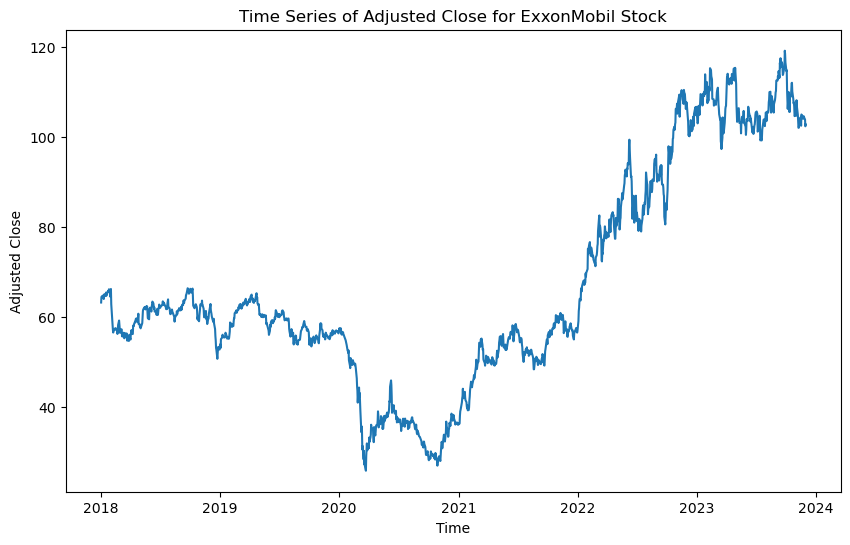

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Fetching ExxonMobil stock data (XOM)
stock_data = yf.download('XOM', start='2018-01-01', end='2023-12-01')

# Drop rows with missing values
stock_data.dropna(inplace=True)

# Convert index to datetime
stock_data.index = pd.to_datetime(stock_data.index)

# Plotting the Adjusted Close Time Series
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Adj Close'])
plt.title('Time Series of Adjusted Close for ExxonMobil Stock')
plt.xlabel('Time')
plt.ylabel('Adjusted Close')
plt.show()


<Figure size 1000x600 with 0 Axes>

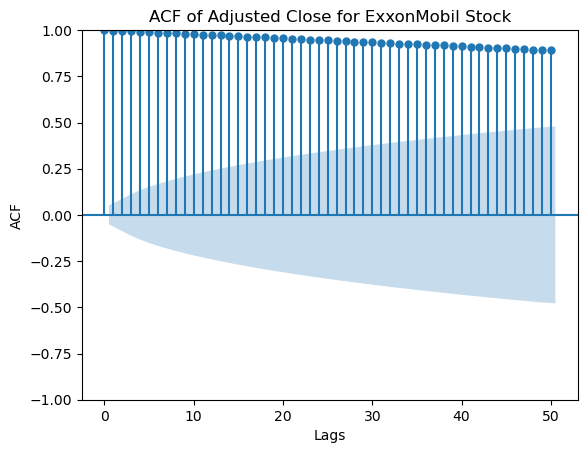

ADF Statistic: -0.4929955457289523
p-value: 0.893376136149364
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
ADF Statistic: -8.638722863442624
p-value: 5.499848736491483e-14
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [2]:
# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(stock_data['Adj Close'], lags=50)
plt.title('ACF of Adjusted Close for ExxonMobil Stock')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Augmented Dickey-Fuller Test
result = adfuller(stock_data['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

# Creating a differenced series
diff_series = stock_data['Adj Close'].diff(periods=2).dropna()

# Augmented Dickey-Fuller Test
result = adfuller(diff_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')


<Figure size 1000x600 with 0 Axes>

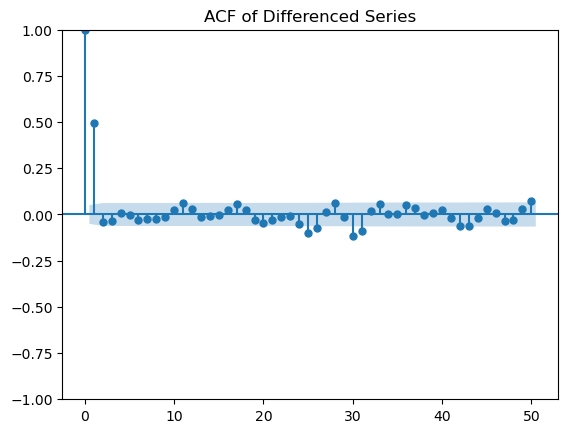

<Figure size 1000x600 with 0 Axes>

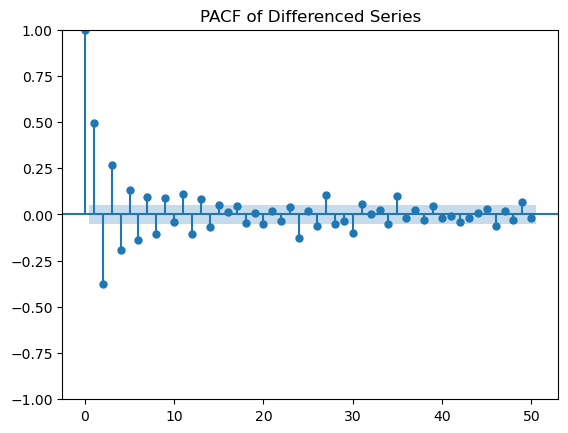

In [3]:
# Plotting ACF and PACF for the differenced series
plt.figure(figsize=(10, 6))
plot_acf(diff_series, lags=50)
plt.title('ACF of Differenced Series')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(diff_series, lags=50)
plt.title('PACF of Differenced Series')
plt.show()

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming stock_data is your DataFrame and 'Adj Close' is the column
# Replacing p, d, q with the  identified values
model = ARIMA(diff_series, order=(3, 2, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1487
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -2774.675
Date:                Sat, 16 Dec 2023   AIC                           5559.350
Time:                        23:07:15   BIC                           5585.866
Sample:                             0   HQIC                          5569.233
                               - 1487                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0376      0.022      1.700      0.089      -0.006       0.081
ar.L2         -0.5288      0.016    -32.682      0.000      -0.561      -0.497
ar.L3         -0.0088      0.021     -0.421      0.6

In [5]:
model2= ARIMA(diff_series, order=(2, 2, 1))
model2_fit = model2.fit()

# Summary of the model
print(model2_fit.summary())

C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1487
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -2774.734
Date:                Sat, 16 Dec 2023   AIC                           5557.467
Time:                        23:07:17   BIC                           5578.680
Sample:                             0   HQIC                          5565.374
                               - 1487                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0422      0.017      2.504      0.012       0.009       0.075
ar.L2         -0.5291      0.016    -32.650      0.000      -0.561      -0.497
ma.L1         -1.0000      1.216     -0.822      0.4

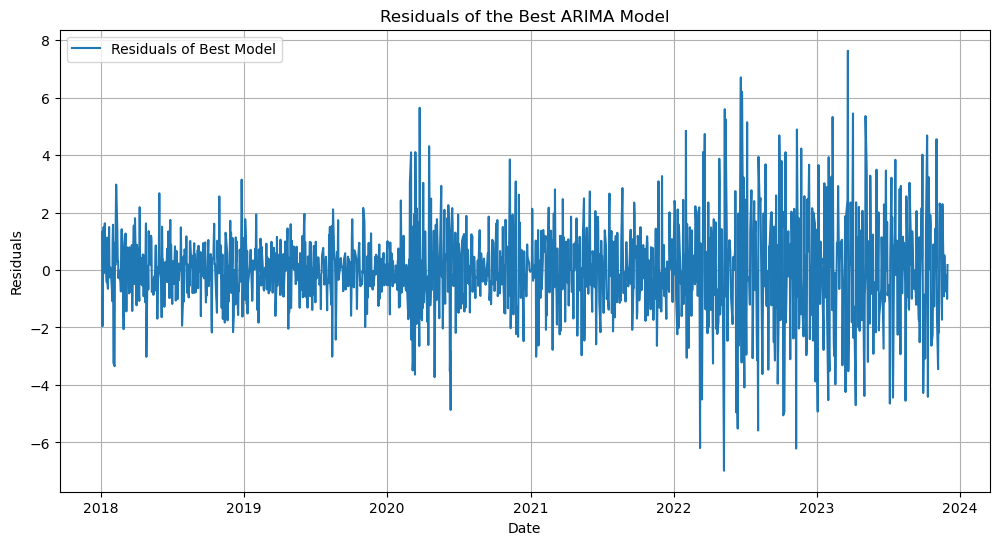

In [6]:
residuals = model2_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals of Best Model')
plt.title('Residuals of the Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

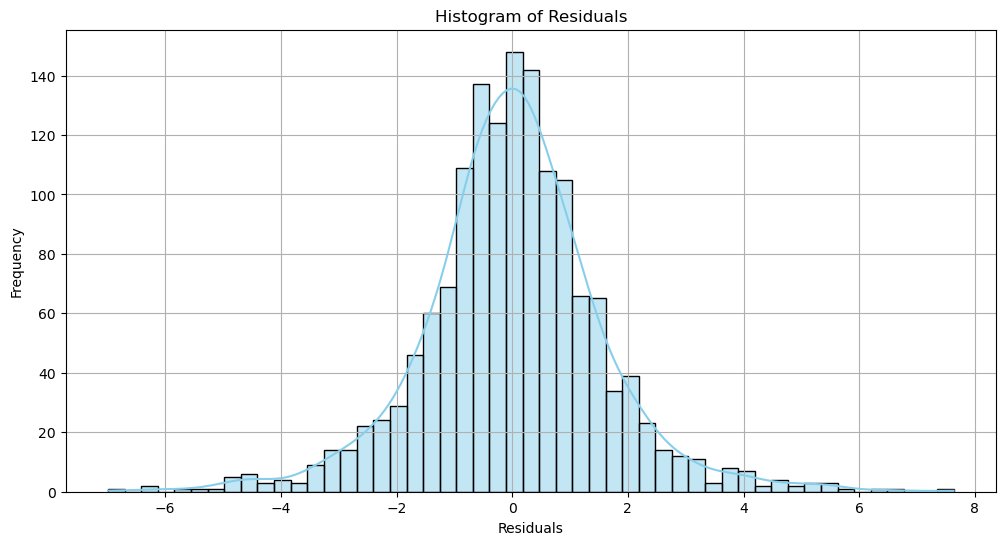

In [7]:
import seaborn as sns
# Plot histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

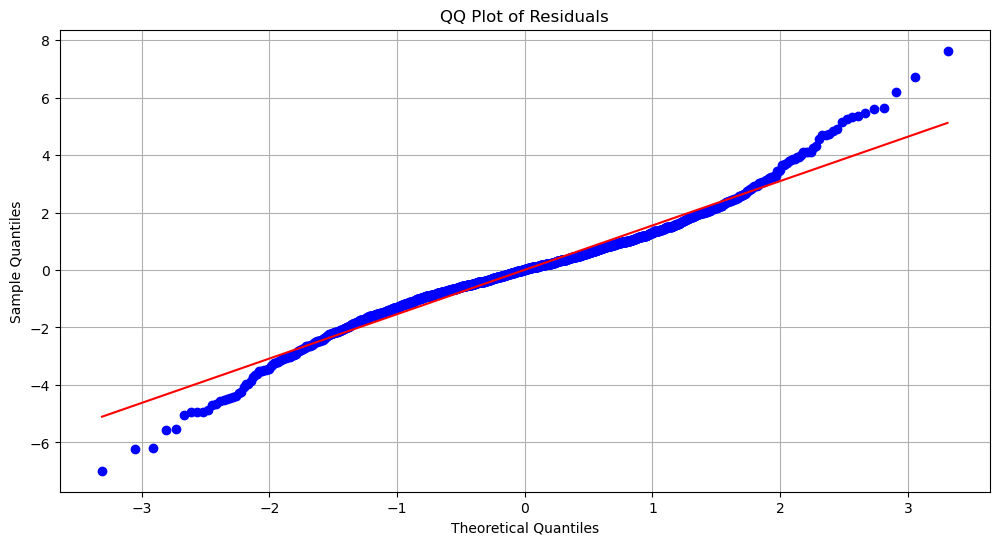

In [8]:
import scipy.stats as stats
import pylab
# Plot QQ plot of residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title('QQ Plot of Residuals')
pylab.xlabel('Theoretical Quantiles')
pylab.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

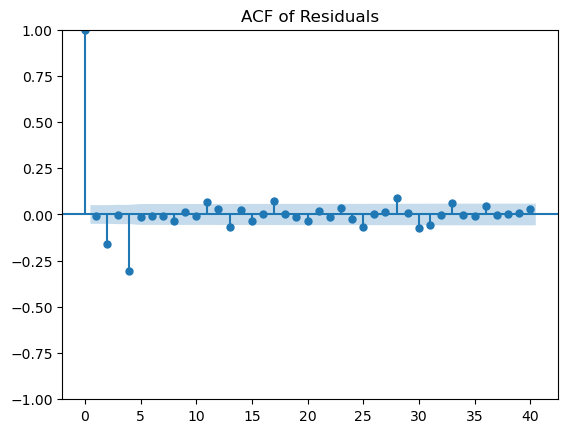

<Figure size 1200x600 with 0 Axes>

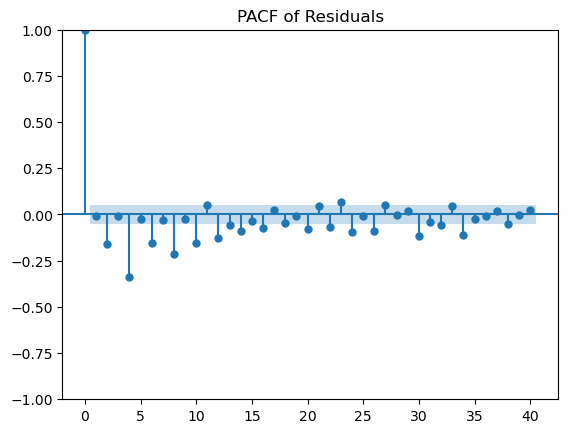

In [9]:
# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, title='ACF of Residuals')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, title='PACF of Residuals')
plt.show()

In [10]:
from scipy.stats import shapiro
# Perform Shapiro-Wilk test on residuals
shapiro_stat, shapiro_p_value = shapiro(residuals)

print(f'Shapiro-Wilk Statistic: {shapiro_stat}')
print(f'p-value: {shapiro_p_value}')

# Interpret the results
alpha = 0.05
if shapiro_p_value > alpha:
    print('Fail to reject the null hypothesis: Residuals are normally distributed.')
else:
    print('Reject the null hypothesis: Residuals may not be normally distributed.')

Shapiro-Wilk Statistic: 0.9705153703689575
p-value: 7.117614547055436e-17
Reject the null hypothesis: Residuals may not be normally distributed.


In [11]:
diff_series

Date
2018-01-04    1.330868
2018-01-05    0.037186
2018-01-08    0.237938
2018-01-09    0.014854
2018-01-10   -0.788124
                ...   
2023-11-24    0.110001
2023-11-27   -0.050003
2023-11-28   -0.669998
2023-11-29   -1.620003
2023-11-30   -1.160004
Name: Adj Close, Length: 1487, dtype: float64

C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sasha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


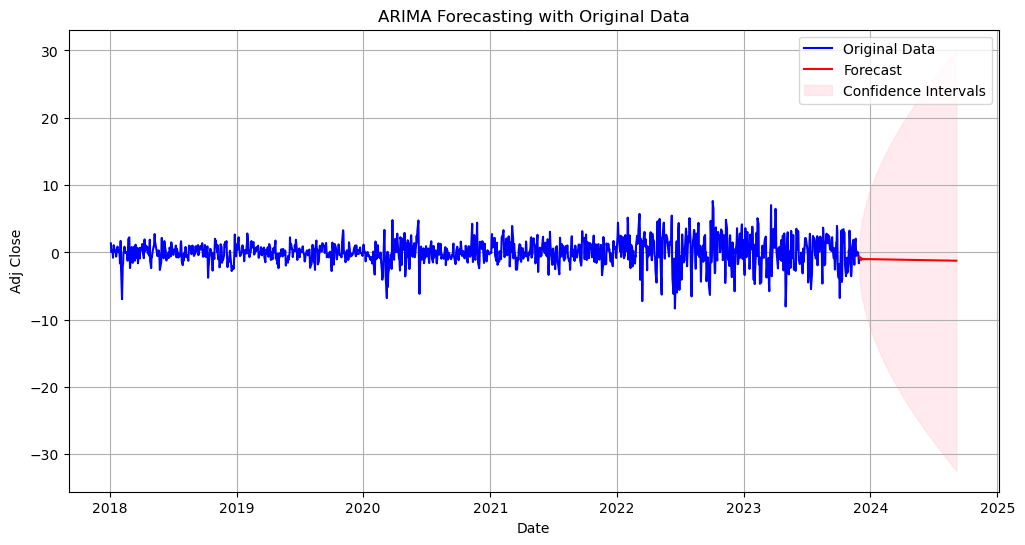

In [12]:
# Forecast future values
forecast_steps = 200  # Adjust the number of steps you want to forecast
forecast = model2_fit.get_forecast(steps=forecast_steps)

# Get the forecasted values, confidence intervals, and index for plotting
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
index_forecast = pd.date_range(diff_series.index[-1], periods=forecast_steps + 1, freq='B')[1:]

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(diff_series, label='Original Data', color='blue')
plt.plot(index_forecast, forecast_values, color='red', label='Forecast')
plt.fill_between(index_forecast, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('ARIMA Forecasting with Original Data')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [14]:
from arch import *
# Fit a GARCH(1,1) model
model = arch_model(diff_series, vol='Garch', p=2, q=1)
results = model.fit()

# Display the model summary
print(results.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4612.792634095531
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4614.367963534916
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3555.1699274639577
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3090.377834656064
Iteration:      5,   Func. Count:     42,   Neg. LLF: 3435.656752690962
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2748.537633206536
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2749.090065791049
Iteration:      8,   Func. Count:     62,   Neg. LLF: 2748.155833662994
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2748.1341538687857
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2748.133150784535
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2748.1331312827056
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2748.133131282826
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2748.1331312827056
            Iterations: 

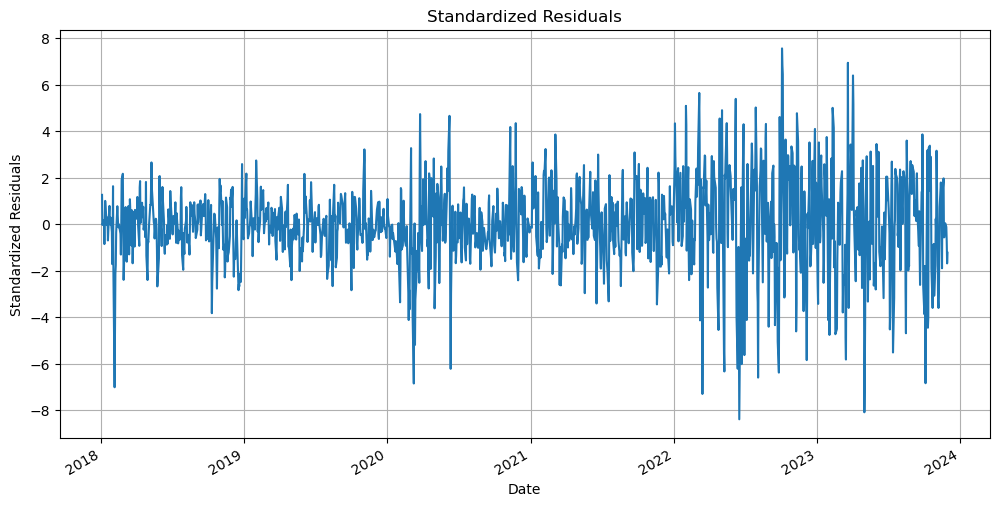

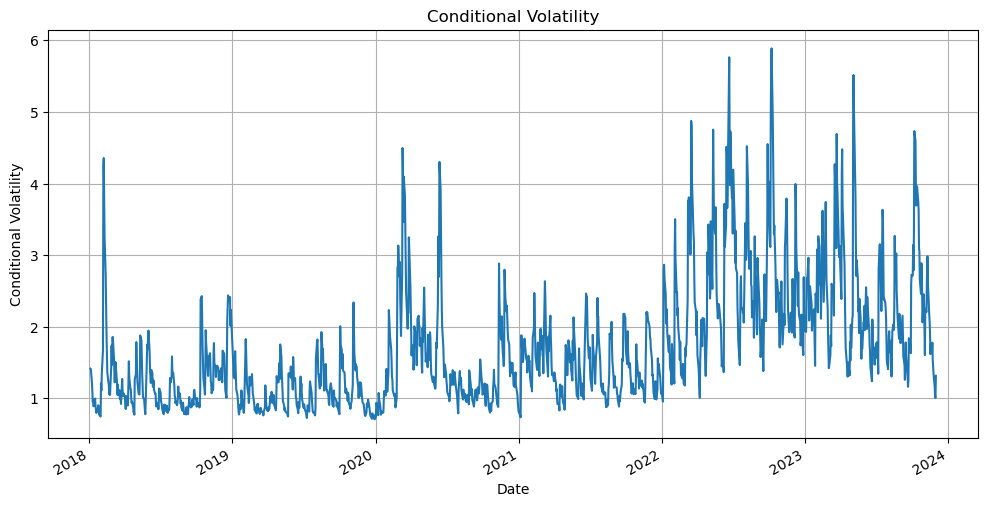

In [15]:
# Plot the standardized residuals
plt.figure(figsize=(12, 6))
results.resid.plot(title='Standardized Residuals')
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.show()

# Plot the conditional volatility
plt.figure(figsize=(12, 6))
results.conditional_volatility.plot(title='Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.show()

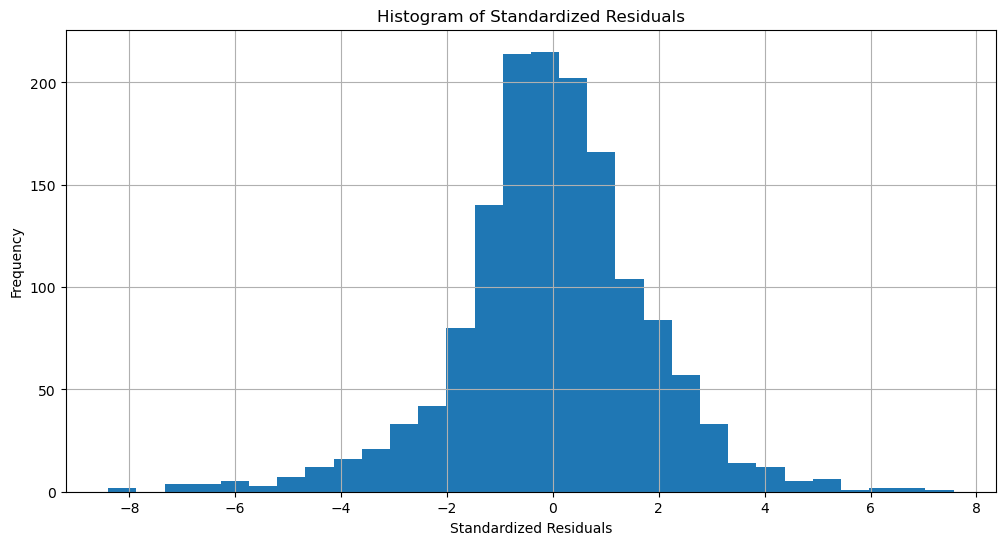

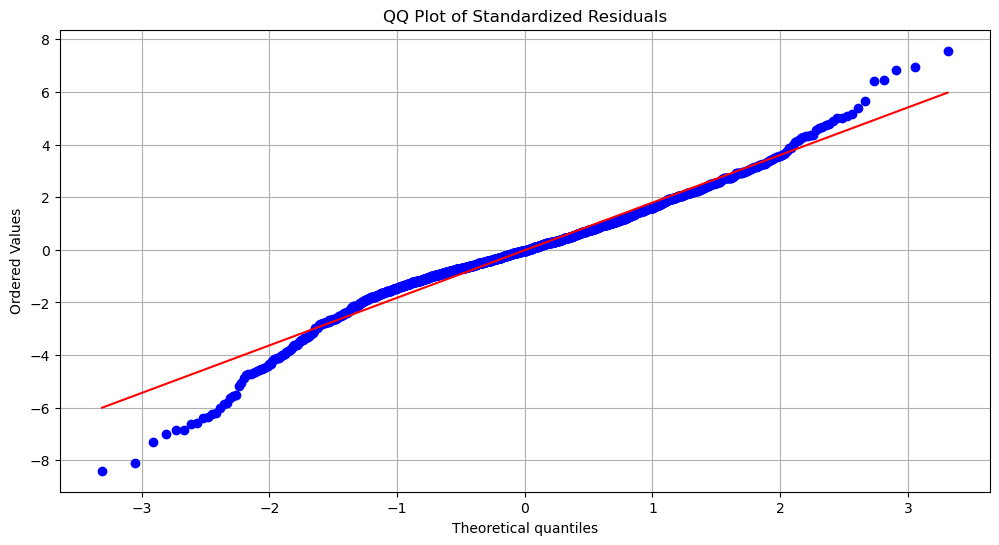

<Figure size 1200x600 with 0 Axes>

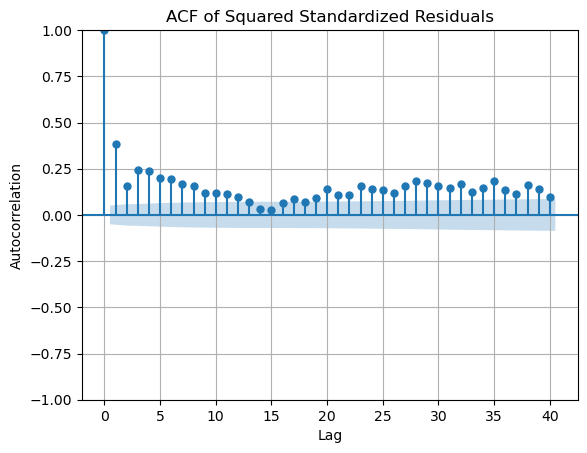

In [16]:
from scipy.stats import probplot
plt.figure(figsize=(12, 6))
results.resid.plot(kind='hist', bins=30, title='Histogram of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
probplot(results.resid, plot=plt)
plt.title('QQ Plot of Standardized Residuals')
plt.grid(True)
plt.show()


squared_resid = results.resid**2
plt.figure(figsize=(12, 6))
plot_acf(squared_resid, lags=40, title='ACF of Squared Standardized Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Forecasted Volatility:
h.01    1.776722
h.02    1.895781
h.03    2.013383
h.04    2.129546
h.05    2.244287
h.06    2.357623
h.07    2.469572
h.08    2.580150
h.09    2.689376
h.10    2.797264
Name: 2023-11-30 00:00:00, dtype: float64


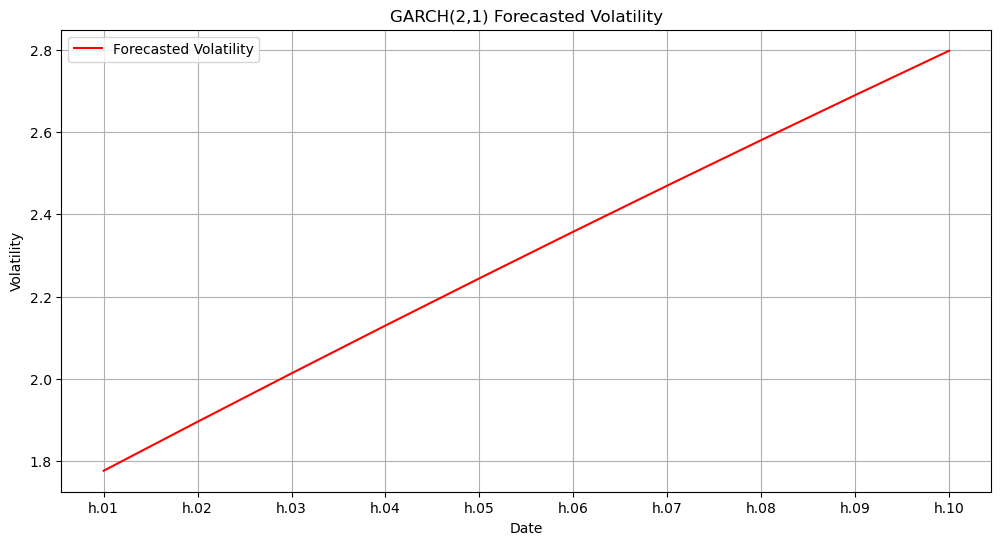

In [17]:
# Forecast future volatility
forecast_horizon = 10  # Adjust the number of periods you want to forecast
forecast = results.forecast(start=None, horizon=forecast_horizon)

# Display the forecasted volatility
print("Forecasted Volatility:")
print(forecast.variance.iloc[-1, :])

# Plot the forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(forecast.variance.iloc[-1, :], label='Forecasted Volatility', color='red')
plt.title('GARCH(2,1) Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

Return Forecast:
2023-12-01   -1.676918
2023-12-04    0.184926
2023-12-05   -3.385189
2023-12-06   -3.899786
2023-12-07   -1.511880
                ...   
2024-08-30   -3.099888
2024-09-02    0.576863
2024-09-03    5.558089
2024-09-04   -5.701870
2024-09-05    3.646072
Freq: B, Name: 2023-11-30 00:00:00, Length: 200, dtype: float64


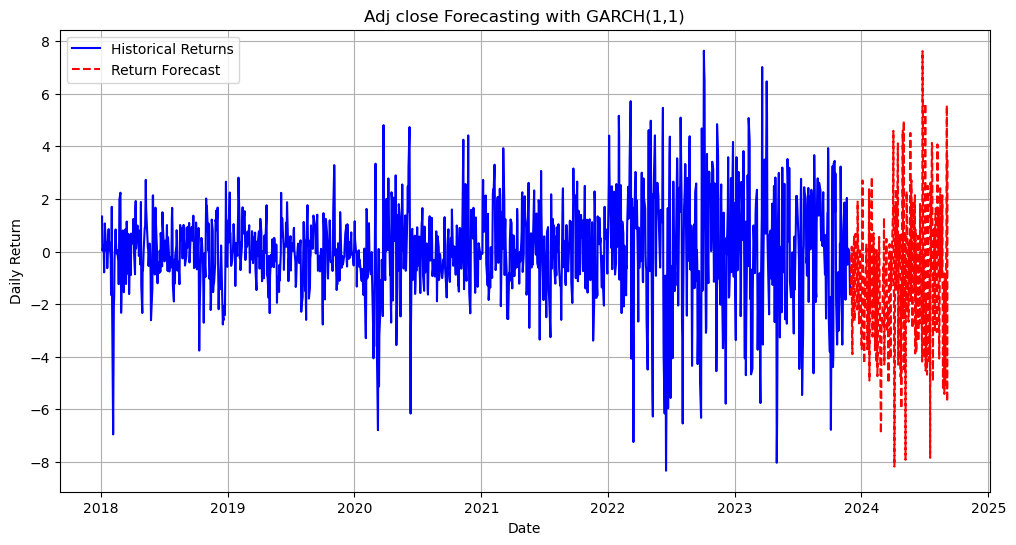

In [18]:
import numpy as np
# Forecast future volatility
forecast_horizon = 200  # Adjust the number of periods you want to forecast
forecast = results.forecast(start=None, horizon=forecast_horizon)

# Get the last observed return
last_return = diff_series.iloc[-1]

# Create a simple return forecast using the last observed return and forecasted volatility
return_forecast = last_return + np.sqrt(forecast.variance.iloc[-1, :]) * np.random.normal(size=forecast_horizon)

# Convert the index to a standard format for plotting
return_forecast.index = pd.date_range(diff_series.index[-1], periods=forecast_horizon + 1, freq='B')[1:]

# Display the return forecast
print("Return Forecast:")
print(return_forecast)

# Plot the return forecast
plt.figure(figsize=(12, 6))
plt.plot(diff_series, label='Historical Returns', color='blue')
plt.plot(return_forecast, label='Return Forecast', color='red', linestyle='dashed')
plt.title('Adj close Forecasting with GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

<center><h1>Seasonal Time Series</h1></center>

In [19]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [20]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
co2_data = pd.read_csv(r"C:\Users\sasha\Downloads\MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
co2_data.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [21]:
co2_data.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2015-11-01', '2015-12-01',        'NaT', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01'],
              dtype='datetime64[ns]', name='YYYYMM', length=5094, freq=None)

In [22]:
ts = co2_data[pd.Series(pd.to_datetime(co2_data.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [23]:
#ss = ts.copy(deep=True)
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [24]:
ts.dropna(inplace = True)

In [25]:
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


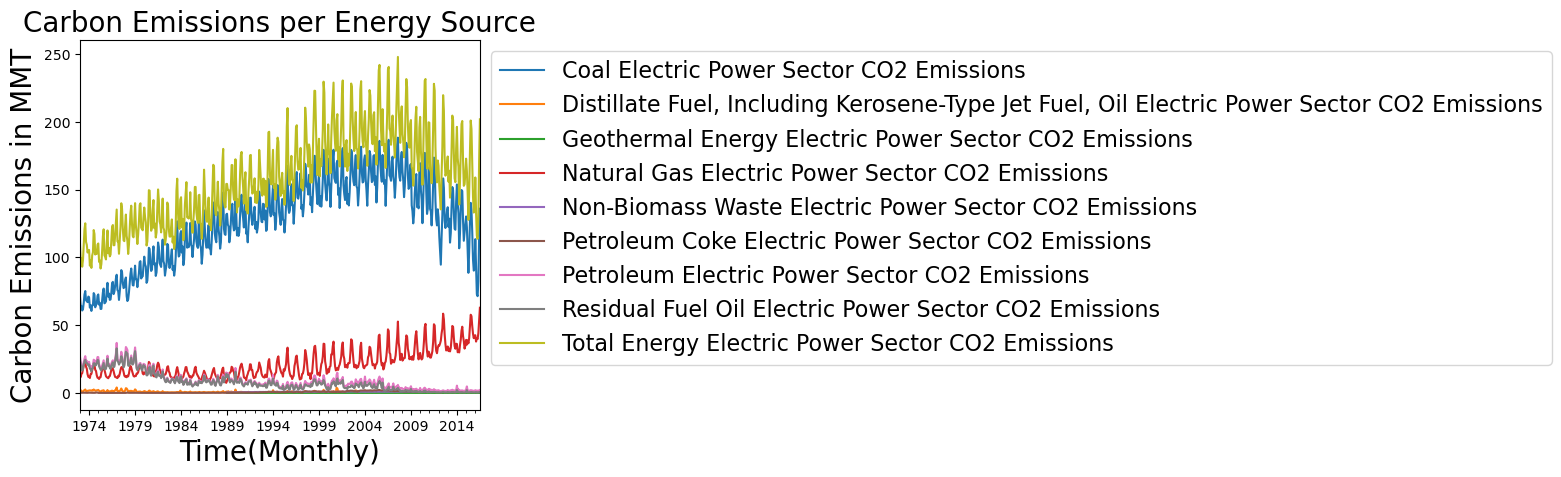

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for desc, group in Energy_sources:
    group.plot(y='Value', label=desc, ax=ax)

ax.set_title('Carbon Emissions per Energy Source', fontsize=20)
ax.set_xlabel('Time(Monthly)')
ax.set_ylabel('Carbon Emissions in MMT')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

# Move the legend outside of the plot on the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)

# Adjust the subplot parameters to fit the legend
plt.subplots_adjust(right=0.75)  # Adjust the right side of the subplot to make space for the legend

plt.show()


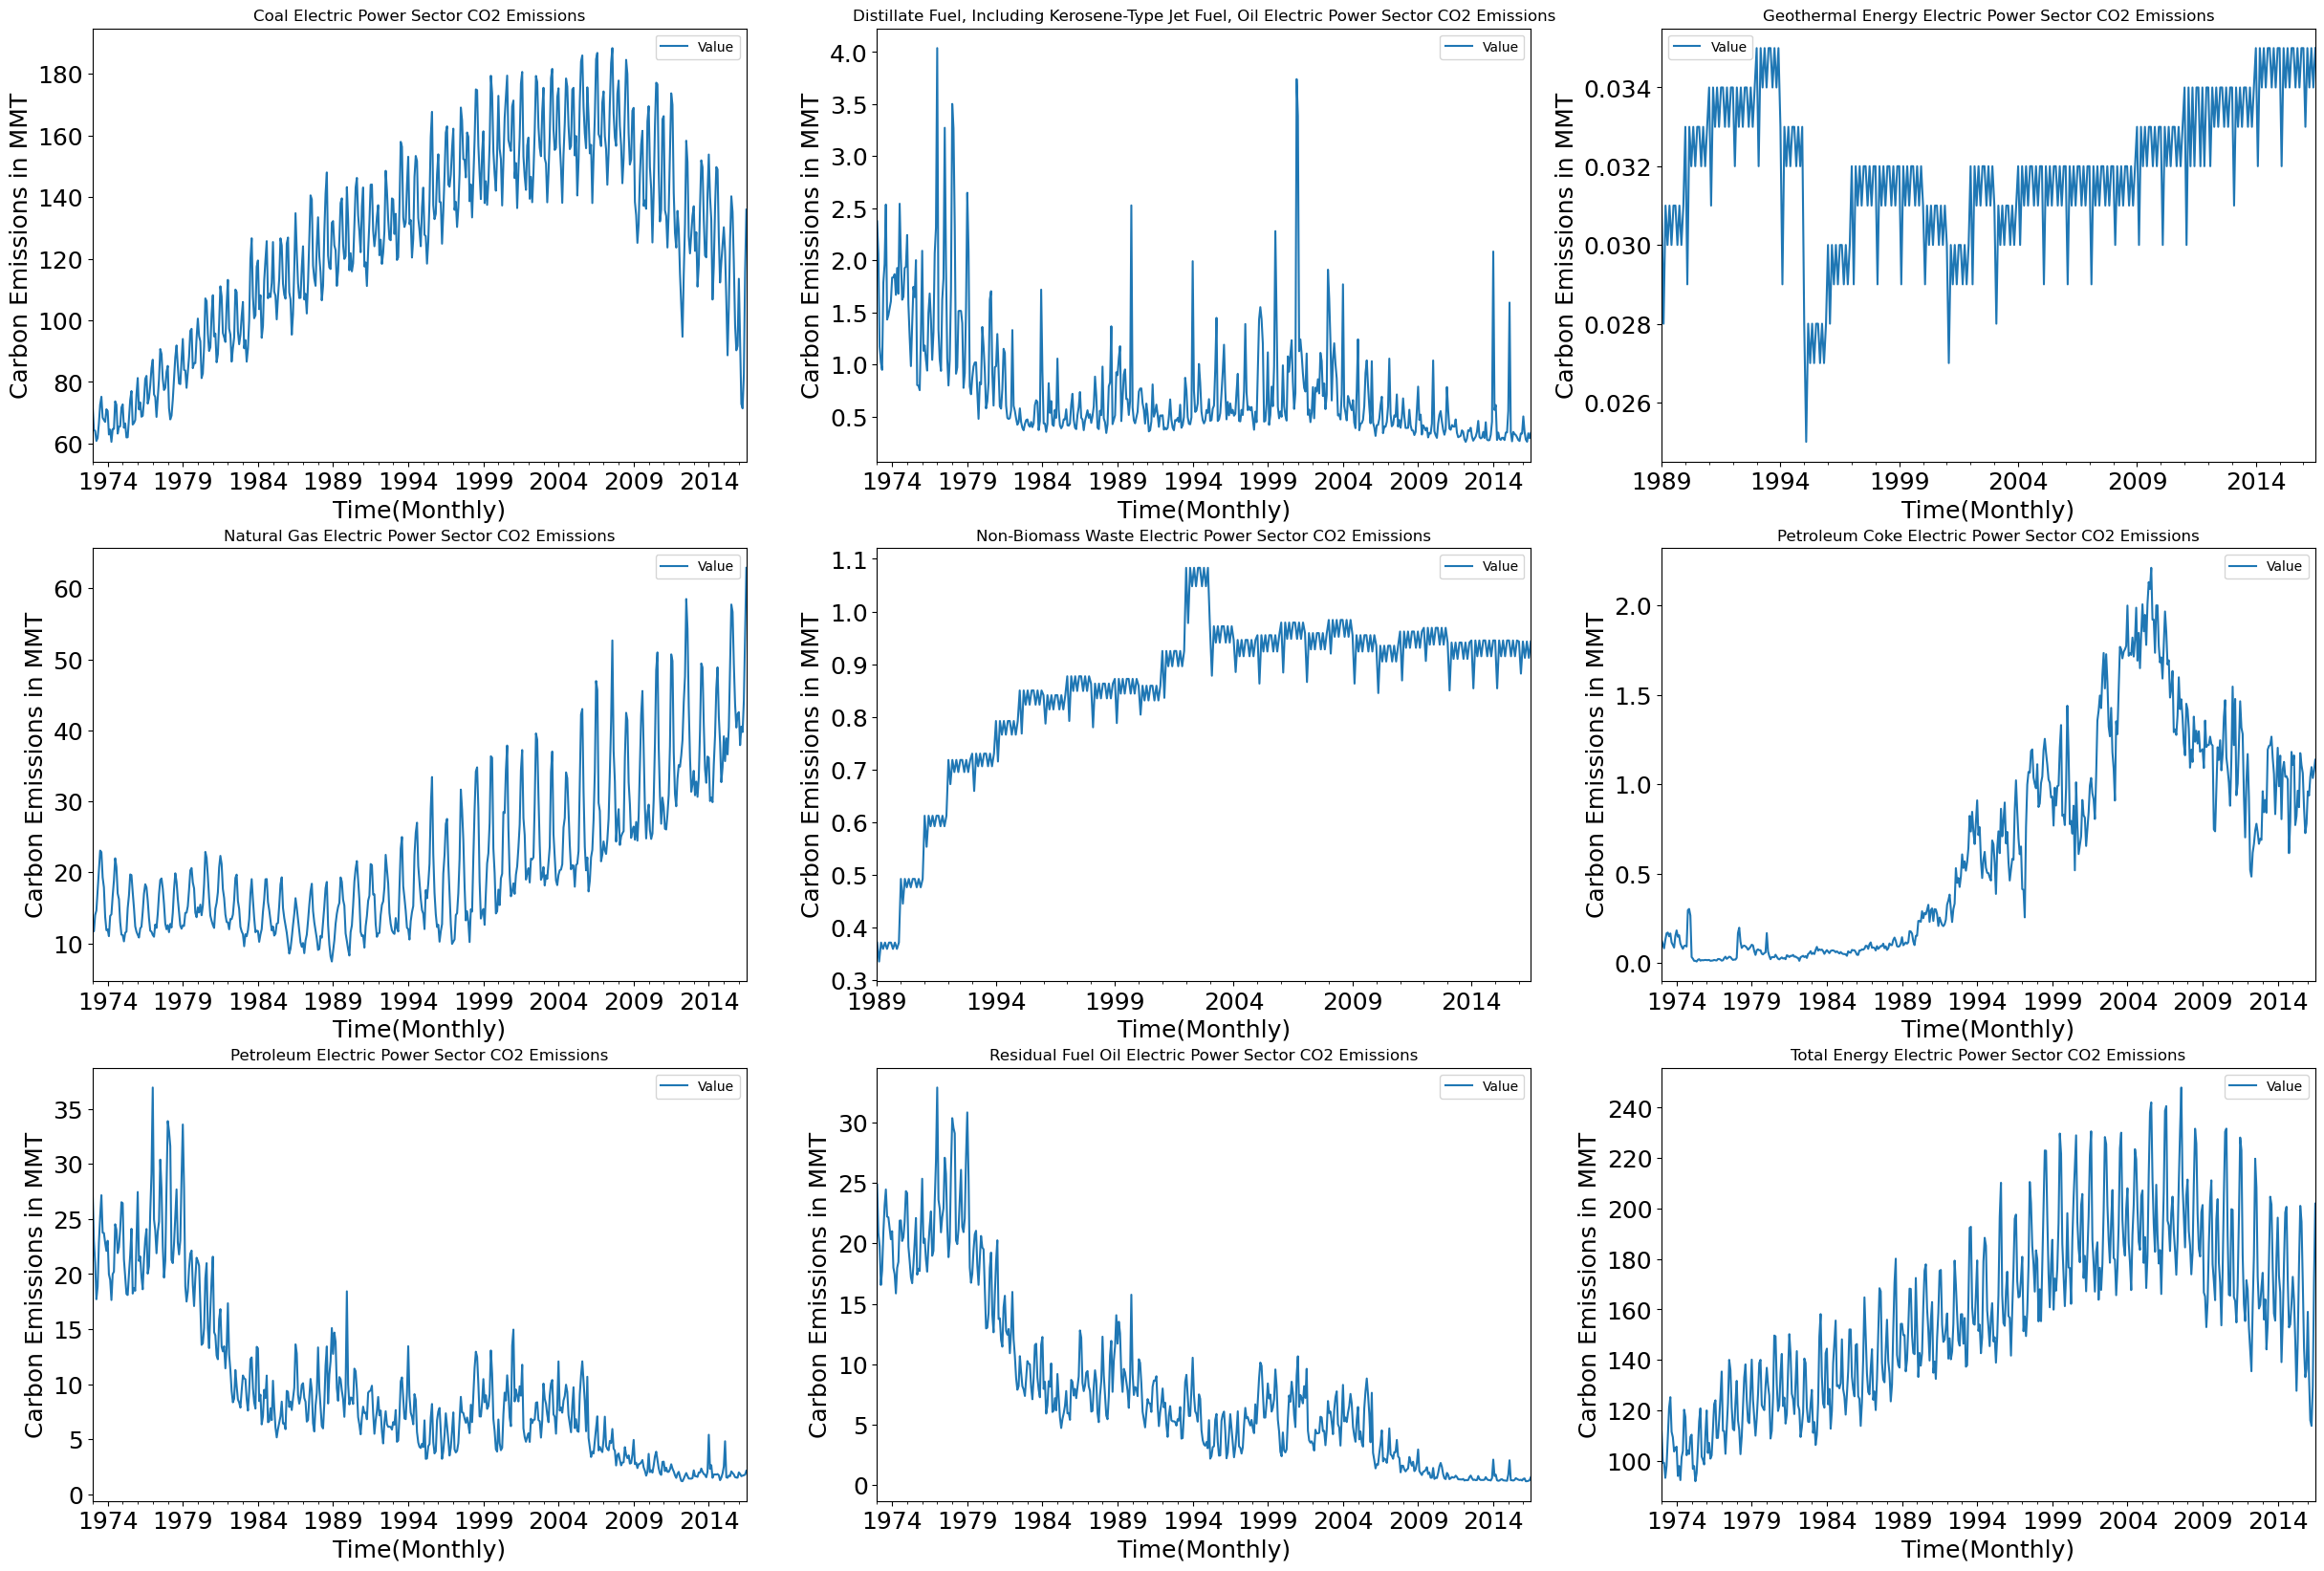

In [27]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In [28]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [29]:
# I want to use shorter descriptions for the energy sources
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [30]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

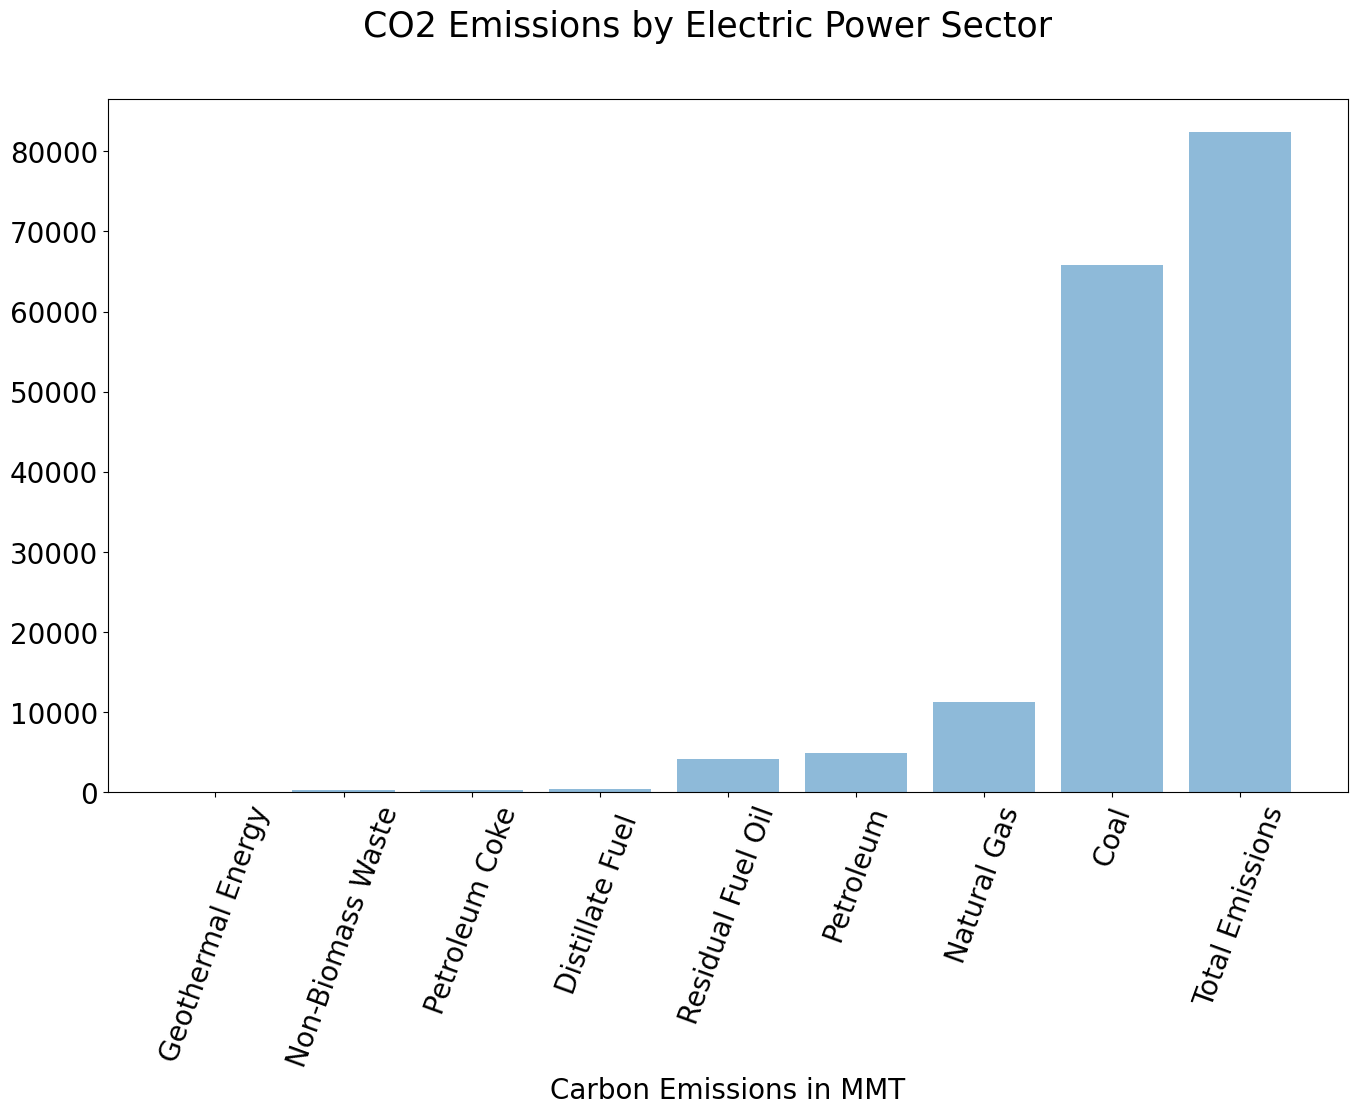

In [31]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()


From the bar chart, we can see that the contribution of coal to the total CO2 emission is significant followed by natural gas.

In [32]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [33]:
mte.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

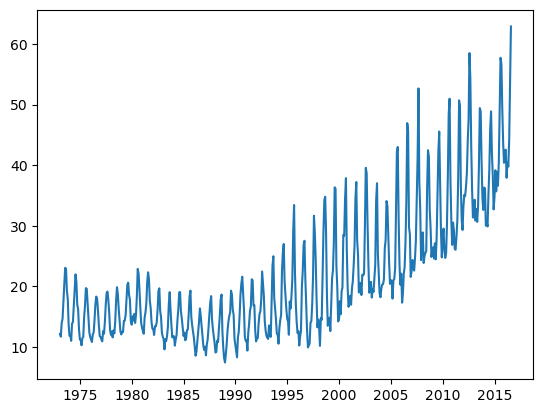

In [34]:
plt.plot(mte)

In [35]:
def TestStationaryPlot(ts, plot_label = None):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25,rotation=90)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 10)
    if plot_label is not None:
        plt.title('Rolling Mean & Standard Deviation (' + plot_label + ')', fontsize = 25)
    else:
        plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [36]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

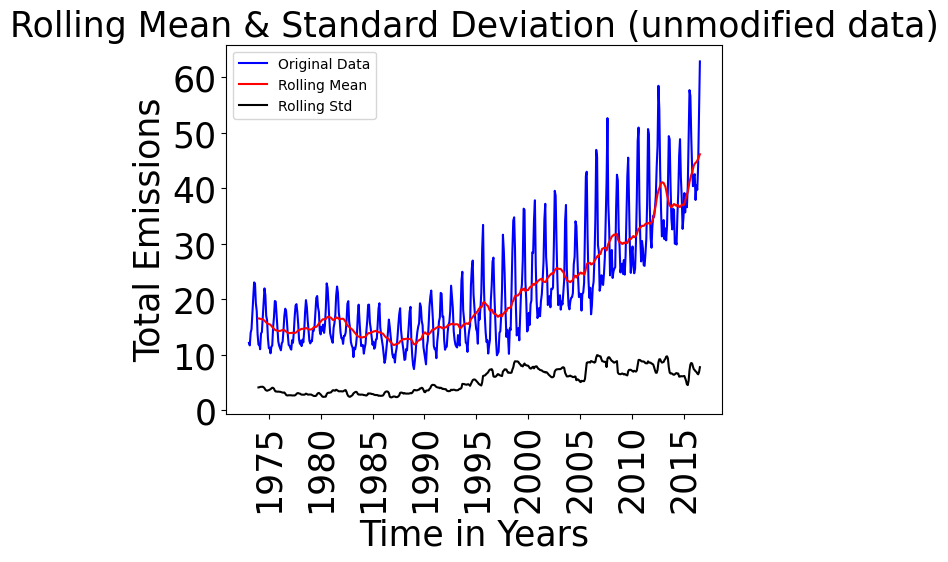

In [37]:
TestStationaryPlot(mte, 'unmodified data')

In [38]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The emissions mean and the variation in standard deviation (black line) clearly vary with time. This shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels. Hence, no evidence to reject the null hypothesis. Therefore, the series is nonstationary.

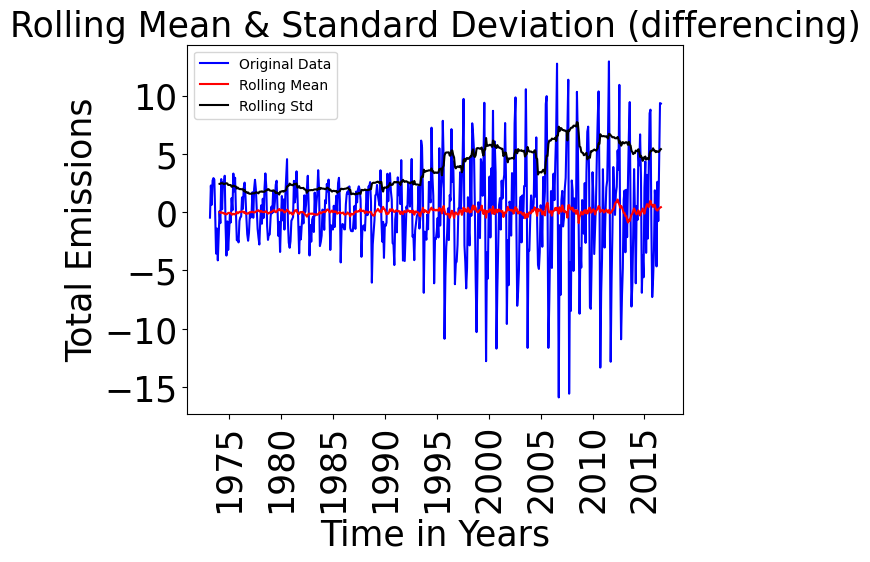

In [39]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False), 'differencing')

In [40]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly. Let us use also the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.

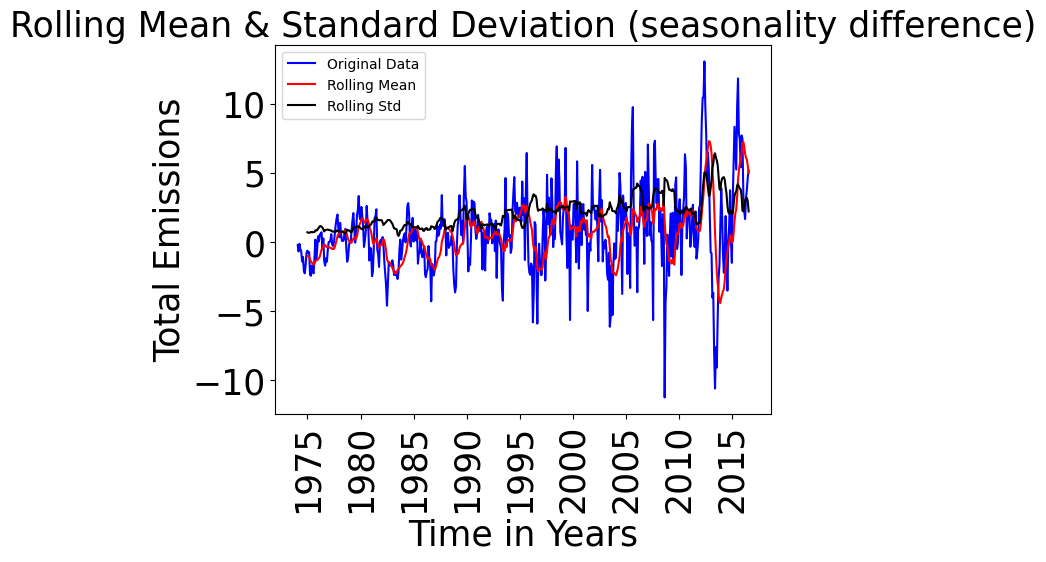

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [41]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False), 'seasonality difference')
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference of the seasonal difference.

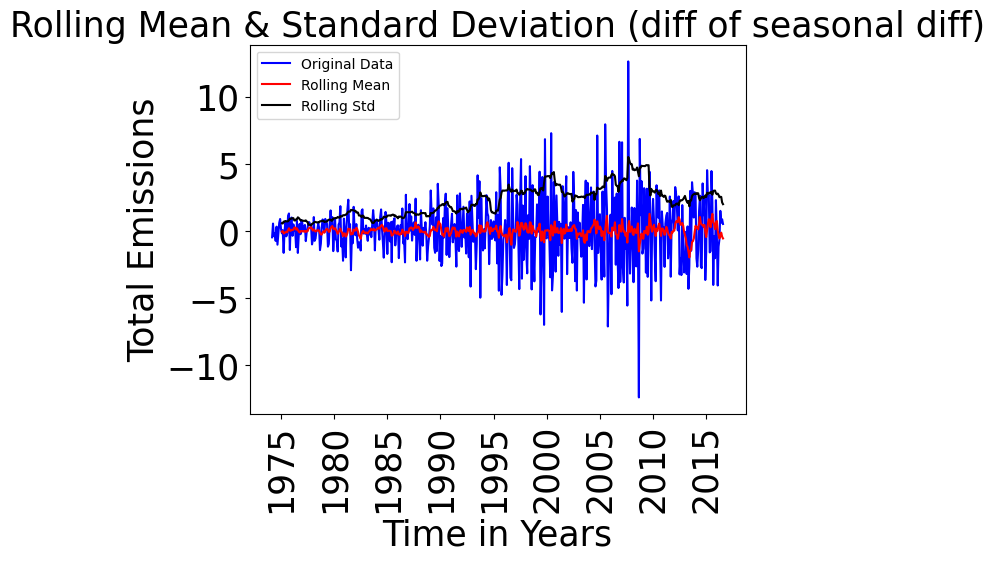

In [42]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False), 'diff of seasonal diff')

In [43]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Now, if we look the Test Statistic and the p-value, taking the seasonal first difference has made our the time series dataset stationary. This differencing procedure could be repeated for the log values, but it didn’t make the dataset any more stationary.

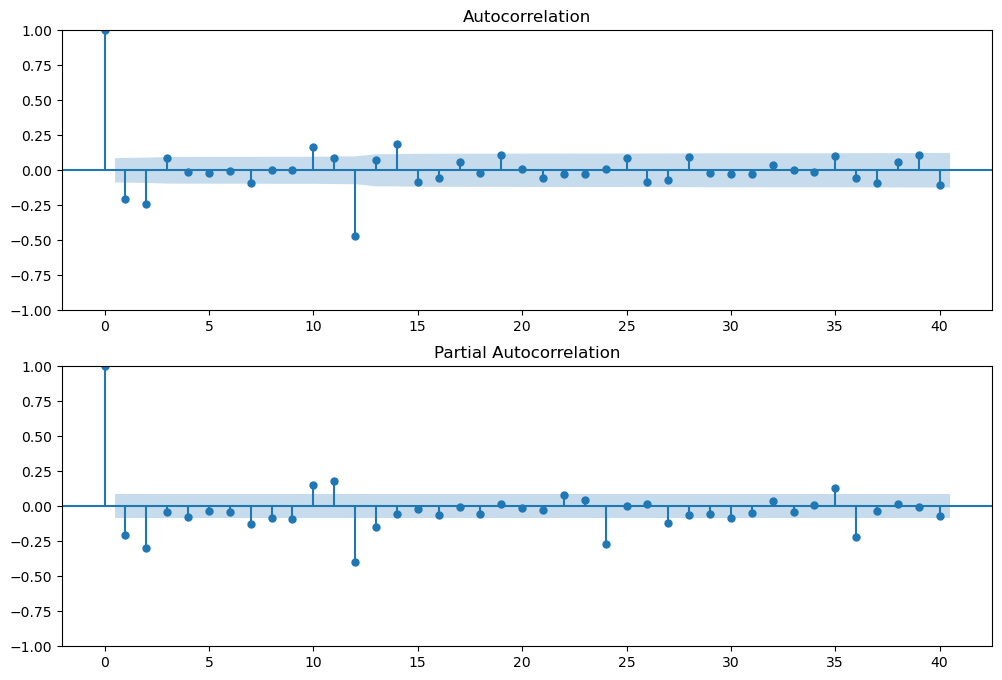

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

plt.show()


In [45]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [46]:
import statsmodels.api as sm  # Make sure to import the correct submodule

results_summary = []  # List to store a tuple of parameters and their corresponding AIC and BIC
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{} - BIC:{}'.format(param, seasonal_param, results.aic, results.bic))
            
            # Only append results if the model has converged
            if results.mle_retvals['converged']:
                results_summary.append((param, seasonal_param, results.aic, results.bic))
            else:
                print('Model with parameters {}x{} did not converge.'.format(param, seasonal_param))
        except Exception as e:
            print('Model fitting failed for parameters {}x{} with error: {}'.format(param, seasonal_param, e))

# Check if the results_summary list is not empty before trying to access its elements
if results_summary:
    # Sort based on AIC values, which are the third elements in the tuples
    results_summary.sort(key=lambda x: x[2])
    best_aic = results_summary[0]
    print('Best AIC found: ARIMA{}x{} - AIC:{} - BIC:{}'.format(best_aic[0], best_aic[1], best_aic[2], best_aic[3]))
    
    # Sort based on BIC values, which are the fourth elements in the tuples
    results_summary.sort(key=lambda x: x[3])
    best_bic = results_summary[0]
    print('Best BIC found: ARIMA{}x{} - AIC:{} - BIC:{}'.format(best_bic[0], best_bic[1], best_bic[2], best_bic[3]))
else:
    print('No results to report. All model fittings failed or did not converge.')


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4804.065995091217 - BIC:4808.3236626790995
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4135.625648186426 - BIC:4144.094469637863
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2572.1947577443725 - BIC:2576.429168470091
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2504.209502835845 - BIC:2512.6307029898944
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2544.146426616797 - BIC:2552.619165797204
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2465.1472629976242 - BIC:2477.8504951747796
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2511.043139693216 - BIC:2519.4683518847187
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2505.8402380709167 - BIC:2518.472038301991
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4157.561225515867 - BIC:4166.072725599373
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3572.105901597977 - BIC:3584.803245647629
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2334.7247254087033 - BIC:2343.1896214418043
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2245.507386420738 - BIC:2258.133156499028
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2329.0446013807177 - BIC:2341.75

In [47]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Sat, 16 Dec 2023   AIC                           2003.553
Time:                                                     23:09:02   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

<Axes: xlabel='YYYYMM'>

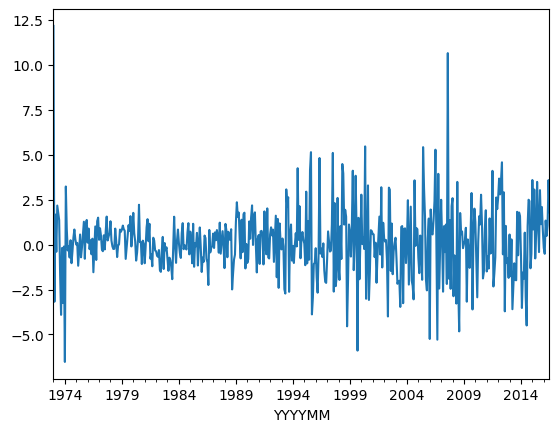

In [48]:
results.resid.plot()

In [49]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528426
25%       -0.791260
50%        0.126975
75%        1.040650
max       12.175000
dtype: float64


<Axes: ylabel='Density'>

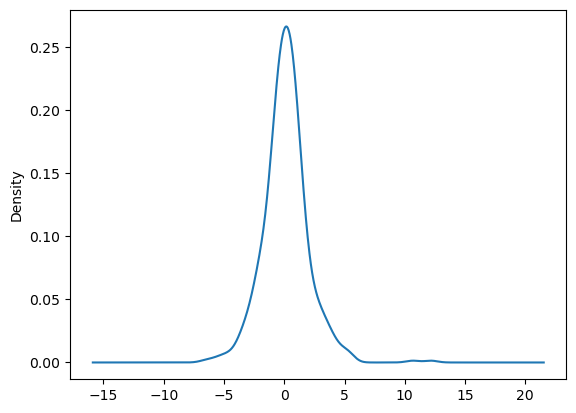

In [50]:
results.resid.plot(kind='kde')

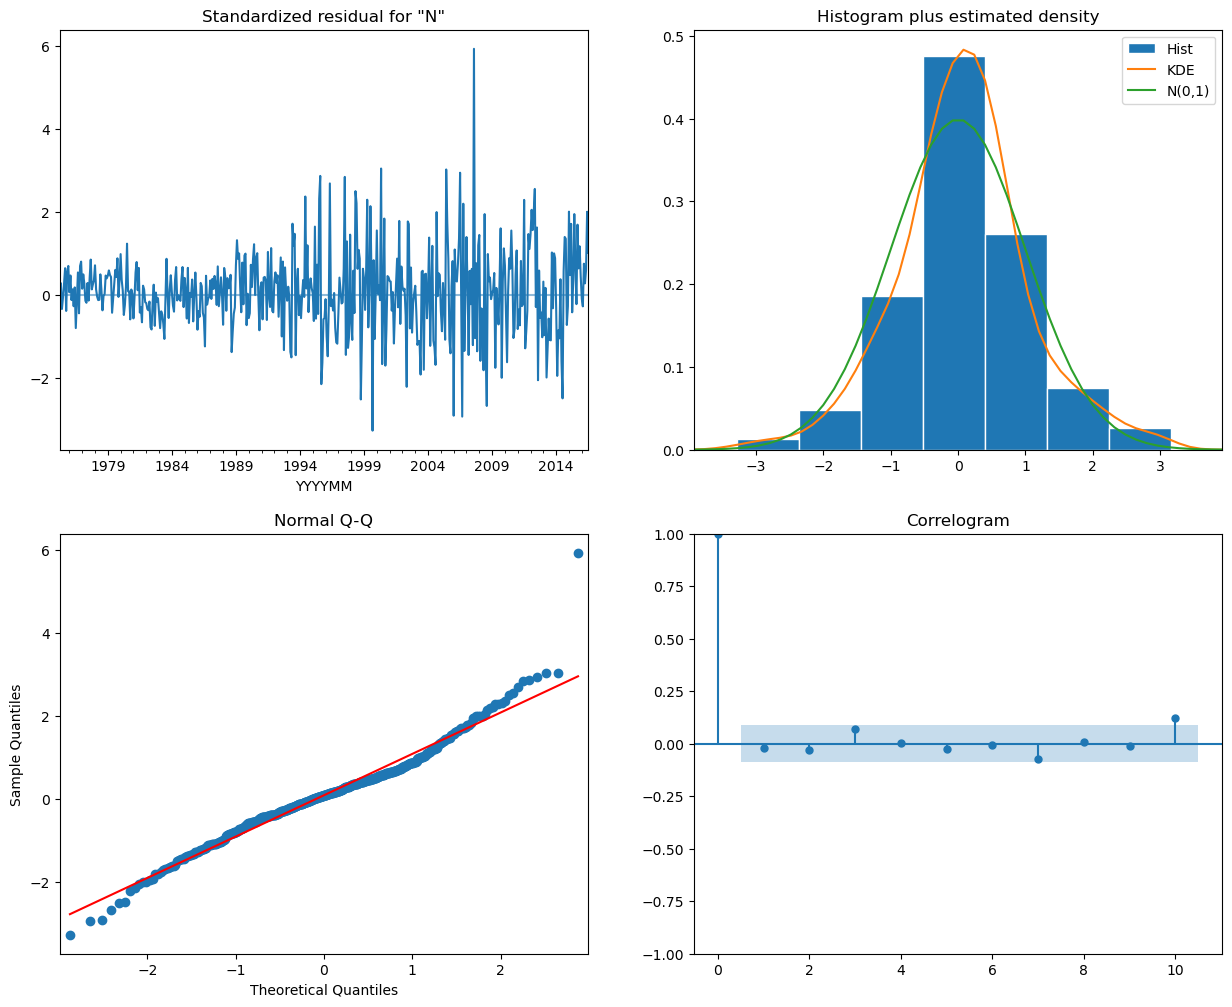

In [51]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [52]:
pred = results.get_prediction(start = 480, end = 522, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,,
2013-01-31,30.203836,37.257326
2013-02-28,29.088381,36.141871
2013-03-31,28.958986,36.012476
2013-04-30,30.708074,37.761564
2013-05-31,32.104080,39.157570


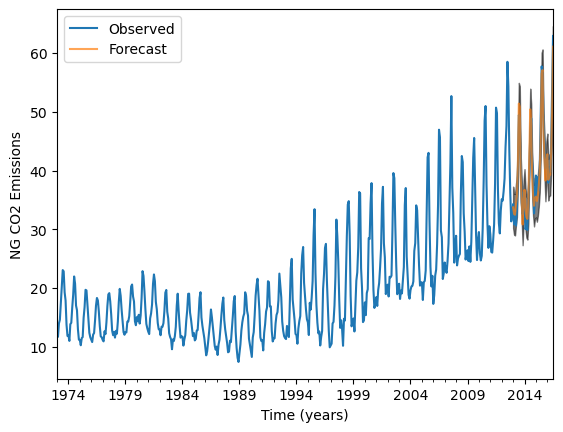

In [53]:
ax = mte['1973':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)  # Fill between for confidence intervals

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()



Overall, our forecasts align with the true values very well, showing an overall similar behavior.

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out.

In [54]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forecast: 2.0236


In [55]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

The goal of developing the model is to get a good quality predictive power using dynamic forecast. That is, we use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points as follows:

In [56]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

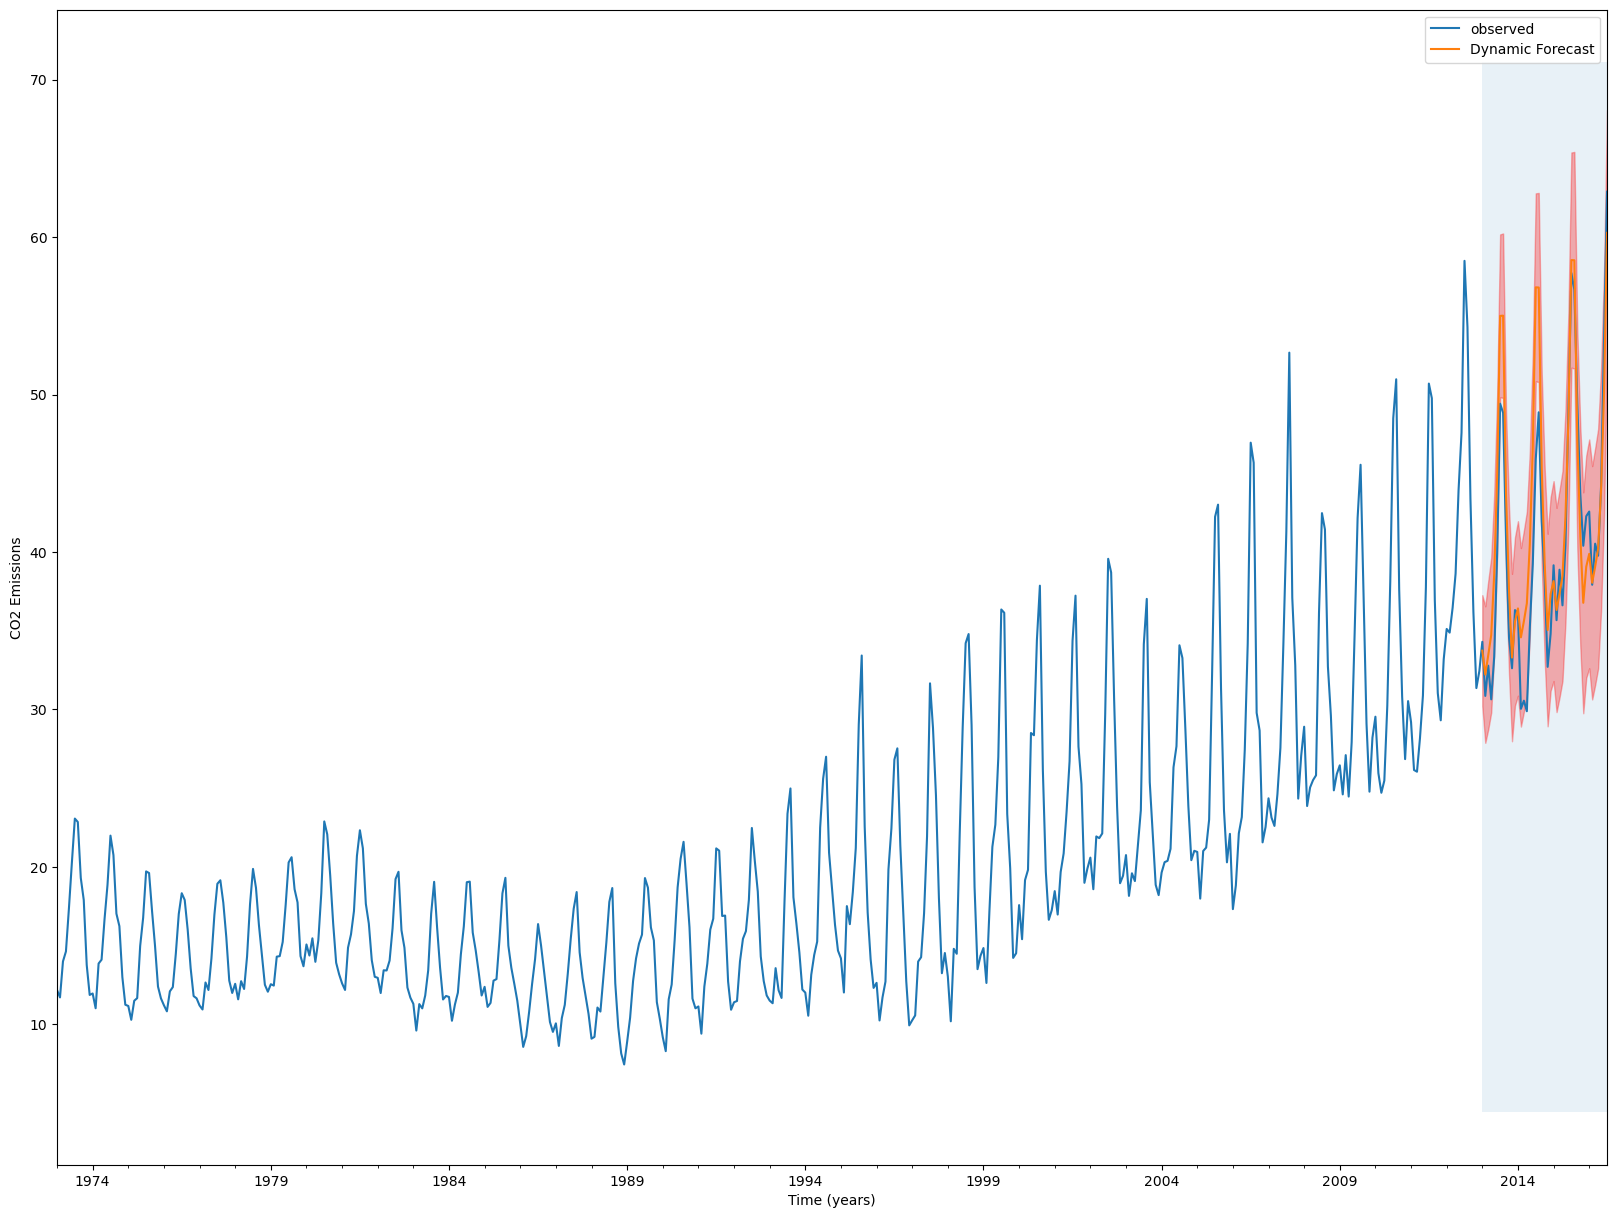

In [57]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [58]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_original = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_original) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_original)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forecast: 3.7936


In [59]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062559,65.116049
2016-09-30,47.316615,55.987495
2016-10-31,40.736073,50.163095
2016-11-30,36.175925,46.010288
2016-12-31,38.095113,48.172699


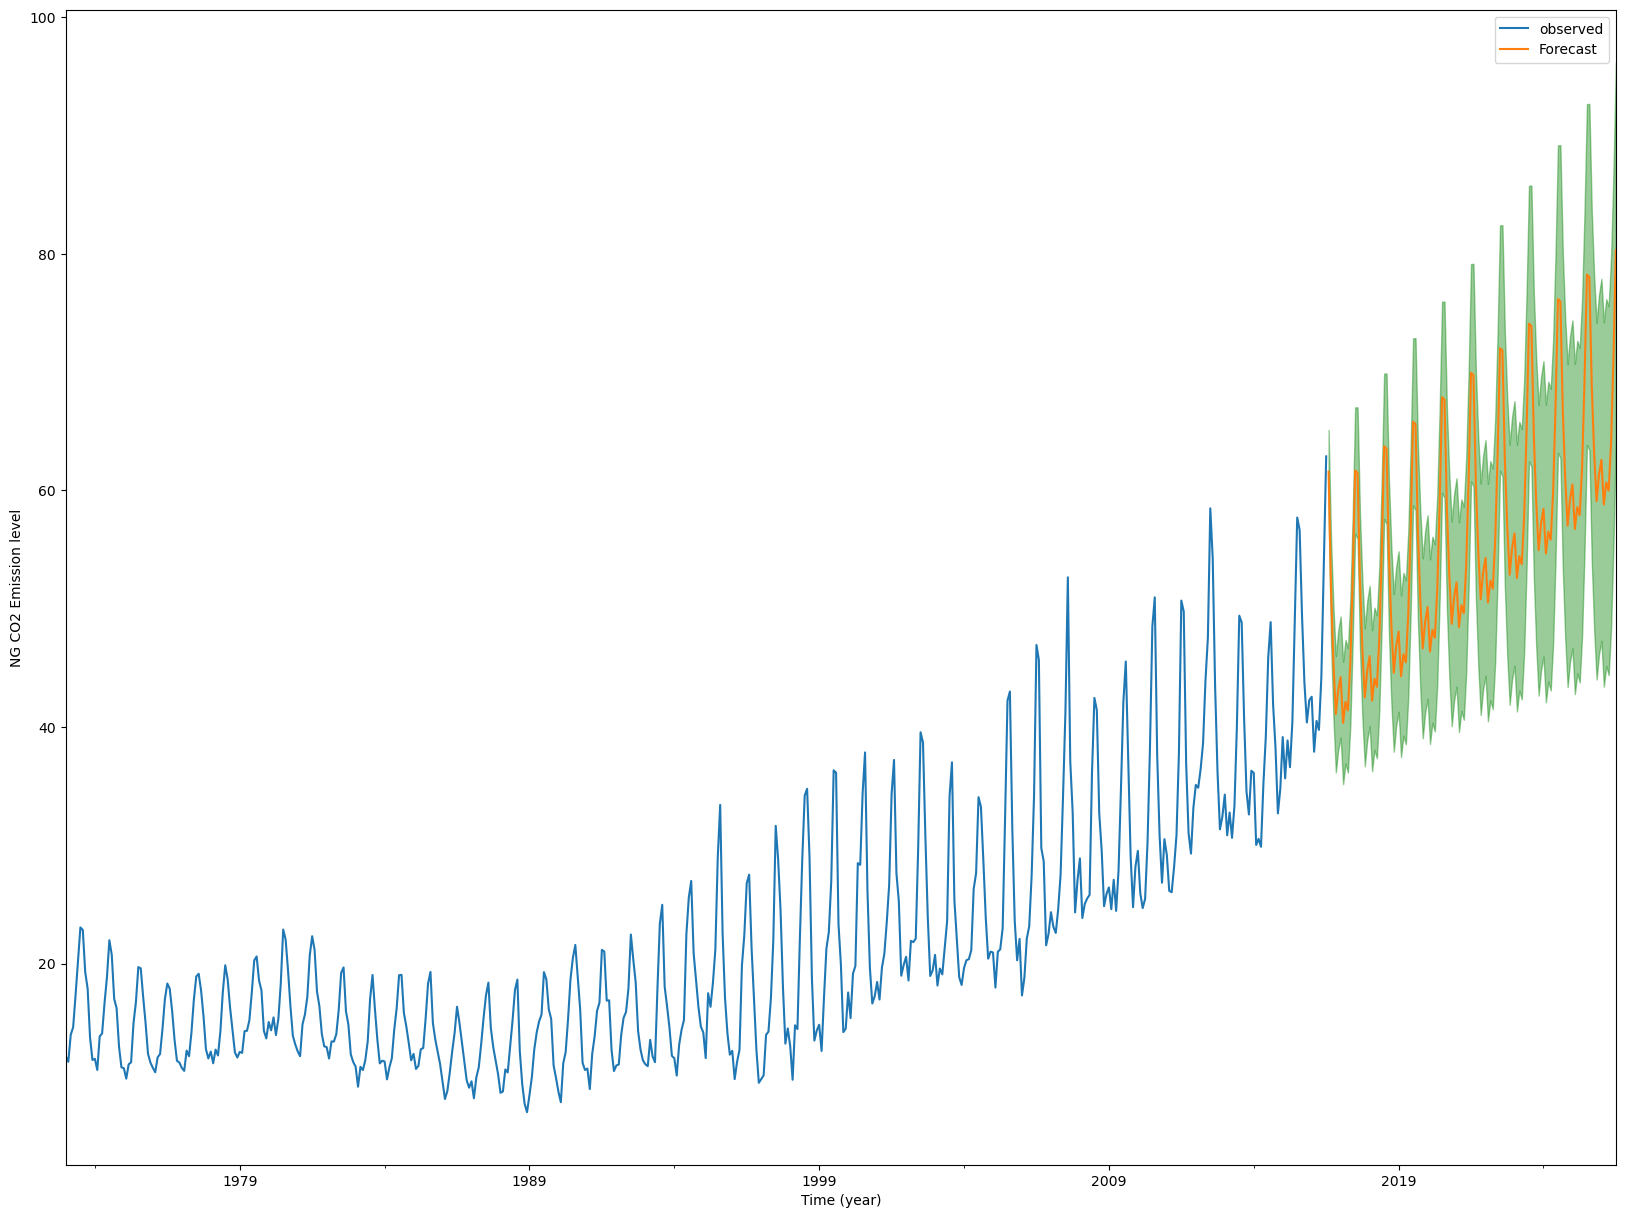

In [60]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

Both the forecast and associated confidence interval that we have generated can now be used to further explore and understand the time series. The forecast shows that the CO2 emission from natural gas power generation is expected to continue increasing.